In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import OrderedDict
%matplotlib inline
sns.set()

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [4]:
#!pip install xgboost

In [5]:
from xgboost import XGBRegressor

In [6]:
df=pd.read_csv(r'C:\Users\opemi\Downloads\listings.csv')

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,1.443,103.796,Private room,83,180,1,10/21/2013,0.010,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,1.332,103.785,Private room,81,90,18,12/26/2014,0.280,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,1.442,103.797,Private room,69,6,20,10/1/2015,0.200,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,1.345,103.957,Private room,206,1,14,8/11/2019,0.150,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,1.346,103.960,Private room,94,1,22,7/28/2019,0.220,9,355


# Data Cleaning

In [8]:
df.shape

(7907, 15)

In [9]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
round(100*(df.isnull().sum()/len(df.index)),2)

id                                0.000
name                              0.030
host_id                           0.000
host_name                         0.000
neighbourhood_group               0.000
latitude                          0.000
longitude                         0.000
room_type                         0.000
price                             0.000
minimum_nights                    0.000
number_of_reviews                 0.000
last_review                      34.880
reviews_per_month                34.880
calculated_host_listings_count    0.000
availability_365                  0.000
dtype: float64

In [77]:
len(df['reviews_per_month'].unique())

528

In [12]:
df['reviews_per_month'].describe()

count   5149.000
mean       1.044
std        1.286
min        0.010
25%        0.180
50%        0.550
75%        1.370
max       13.000
Name: reviews_per_month, dtype: float64

In [13]:
#The fact that some dont have reviews might just mean there's no review so we can replace with zero.
df['reviews_per_month'].fillna(0, inplace=True)

In [14]:
df.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [15]:
(df[df['reviews_per_month']==0]).isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            0
neighbourhood_group                  0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [16]:
len(df['last_review'].unique())

1002

In [17]:
df['last_review'].unique()

array(['10/21/2013', '12/26/2014', '10/1/2015', ..., '4/9/2019',
       '6/17/2019', '3/22/2019'], dtype=object)

In [18]:
df['Year']=df['last_review'].copy()

In [19]:
df['Year'].isnull().sum()

2758

In [20]:
df['Year'].fillna('0/0/0000', inplace=True)

In [21]:
df['Year']=df['Year'].str.split('/')
df['Year']

0       [10, 21, 2013]
1       [12, 26, 2014]
2        [10, 1, 2015]
3        [8, 11, 2019]
4        [7, 28, 2019]
             ...      
7902      [0, 0, 0000]
7903      [0, 0, 0000]
7904      [0, 0, 0000]
7905      [0, 0, 0000]
7906      [0, 0, 0000]
Name: Year, Length: 7907, dtype: object

In [22]:
df['Year']=df['Year'].apply(lambda x:x[2])   #index 2- this calls out only the year as year is in index 2

In [23]:
df['Year'].unique()

array(['2013', '2014', '2015', '2019', '2018', '2016', '0000', '2017'],
      dtype=object)

In [24]:
df['last_review'].fillna('1/1/2012',inplace=True)

In [25]:
df.isnull().sum()

id                                0
name                              2
host_id                           0
host_name                         0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Year                              0
dtype: int64

In [26]:
len(df['host_id'].unique())

2705

In [27]:
len(df['id'].unique())

7907

In [28]:
len(df['name'].unique())

7456

In [29]:
df.drop(['name','id','host_name'], axis=1,inplace=True)

In [30]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
Year                              0
dtype: int64

In [31]:
df.dtypes

host_id                             int64
neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Year                               object
dtype: object

In [32]:
df['last_review']=pd.to_datetime(df['last_review'],infer_datetime_format=True)

In [33]:
df['Year']=df['Year'].astype('int64')

In [34]:
df['Year']

0       2013
1       2014
2       2015
3       2019
4       2019
        ... 
7902       0
7903       0
7904       0
7905       0
7906       0
Name: Year, Length: 7907, dtype: int64

# Encoding

In [35]:
for c in df:
    if df[c].dtype=='O':
        df=pd.concat([df,pd.get_dummies(df[c], prefix=c, drop_first=True)],axis=1)
        df=df.drop(c,axis=1)

In [36]:
df.head()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room
0,266763,1.443,103.796,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0,1,0
1,227796,1.332,103.785,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0,1,0
2,266763,1.442,103.797,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0,1,0
3,367042,1.345,103.957,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0,1,0
4,367042,1.346,103.960,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0,1,0


In [37]:
df.shape

(7907, 17)

<AxesSubplot:>

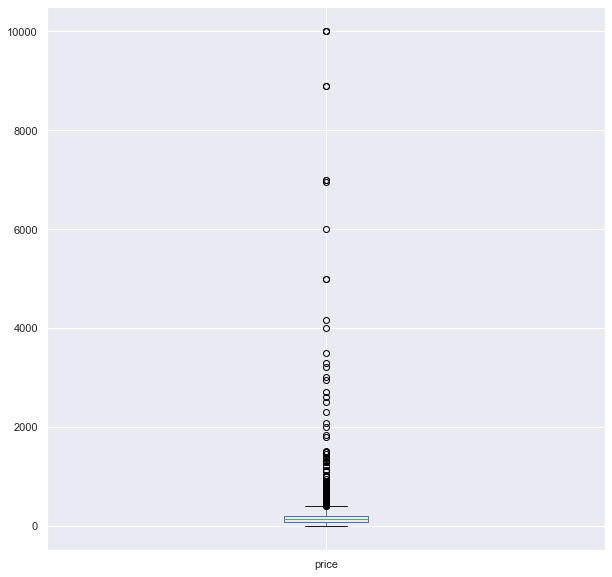

In [38]:
plt.figure(figsize=(10,10))
df["price"].plot.box()

In [39]:
df['price'].values[df['price'].values>500]=500

In [40]:
df[df['price']>500]

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room


<AxesSubplot:>

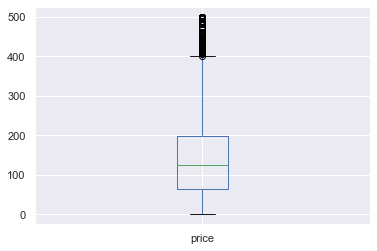

In [41]:
df['price'].plot.box()

In [42]:
df['price'].values[df['price'].values>400]=400

In [43]:
df[df['price']>400]

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room


<AxesSubplot:>

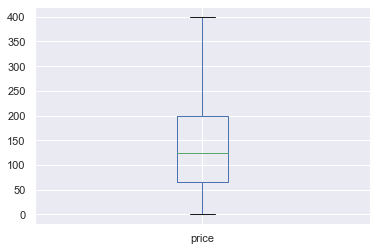

In [44]:
df['price'].plot.box()

In [45]:
df['Month']=df['last_review'].dt.month   #adds a month cloumn with the month contents from the last_review column

In [46]:
df

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,Month
0,266763,1.443,103.796,83,180,1,2013-10-21,0.010,2,365,2013,0,1,0,0,1,0,10
1,227796,1.332,103.785,81,90,18,2014-12-26,0.280,1,365,2014,0,0,0,0,1,0,12
2,266763,1.442,103.797,69,6,20,2015-10-01,0.200,2,365,2015,0,1,0,0,1,0,10
3,367042,1.345,103.957,206,1,14,2019-08-11,0.150,9,353,2019,1,0,0,0,1,0,8
4,367042,1.346,103.960,94,1,22,2019-07-28,0.220,9,355,2019,1,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,278109833,1.280,103.788,100,3,0,2012-01-01,0.000,31,61,0,0,0,0,0,0,0,1
7903,238891646,1.293,103.826,400,6,0,2012-01-01,0.000,34,365,0,0,0,0,0,0,0,1
7904,281448565,1.313,103.860,58,30,0,2012-01-01,0.000,3,173,0,0,0,0,0,1,0,1
7905,243835202,1.295,103.838,56,14,0,2012-01-01,0.000,2,30,0,0,0,0,0,1,0,1


# Checking For MultiCollinearity

In [47]:
cors=df.corr(method='pearson')
cors

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,Month
host_id,1.000,-0.041,-0.016,0.146,-0.090,-0.176,0.040,-0.064,0.042,-0.181,-0.037,-0.008,-0.021,-0.001,-0.106,-0.001,-0.138
latitude,-0.041,1.000,-0.035,-0.191,0.085,-0.015,-0.038,-0.150,-0.069,-0.040,0.136,0.560,0.425,0.264,0.232,-0.057,-0.023
longitude,-0.016,-0.035,1.000,0.011,-0.029,0.102,0.100,0.049,-0.036,0.032,0.487,-0.130,0.152,-0.675,-0.056,-0.018,0.027
price,0.146,-0.191,0.011,1.000,-0.104,-0.062,0.000,0.161,0.120,-0.085,-0.084,-0.066,-0.121,-0.097,-0.487,-0.208,-0.066
minimum_nights,-0.090,0.085,-0.029,-0.104,1.000,-0.076,-0.149,-0.014,0.150,-0.164,0.051,0.044,0.072,0.027,0.083,-0.073,-0.142
number_of_reviews,-0.176,-0.015,0.102,-0.062,-0.076,1.000,0.674,-0.150,-0.067,0.316,0.053,-0.019,-0.006,-0.060,0.023,-0.003,0.323
reviews_per_month,0.040,-0.038,0.100,0.000,-0.149,0.674,1.000,-0.181,-0.108,0.433,0.014,-0.016,-0.012,-0.074,-0.001,-0.030,0.459
calculated_host_listings_count,-0.064,-0.150,0.049,0.161,-0.014,-0.150,-0.181,1.000,0.246,-0.113,-0.114,-0.064,-0.123,-0.074,-0.327,-0.075,-0.140
availability_365,0.042,-0.069,-0.036,0.120,0.150,-0.067,-0.108,0.246,1.000,-0.071,-0.062,0.006,-0.060,-0.039,-0.062,0.102,-0.065
Year,-0.181,-0.040,0.032,-0.085,-0.164,0.316,0.433,-0.113,-0.071,1.000,0.015,-0.042,-0.013,-0.015,0.015,0.025,0.802


<AxesSubplot:>

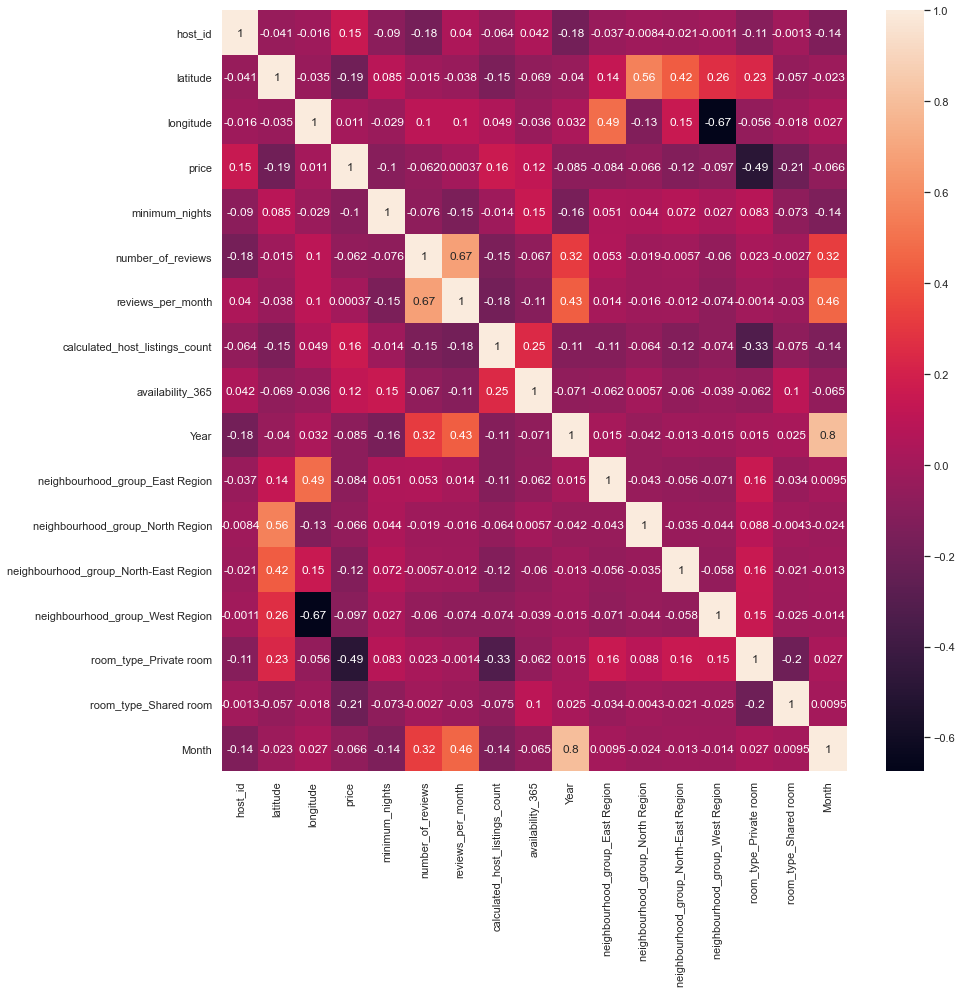

In [48]:
plt.figure(figsize=(14,14))
sns.heatmap(cors,annot=True)

In [103]:
x=df.drop('price',axis=1)
y=df['price']

In [104]:
x=x.drop('last_review',axis=1)

In [51]:
from sklearn.feature_selection import mutual_info_classif
mutual_info_classif(x,y)
imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp
imp.columns=['Importance']
imp.sort_values(by='Importance',ascending=False)

,Importance
host_id,0.754
calculated_host_listings_count,0.659
longitude,0.395
latitude,0.356
room_type_Private room,0.271
minimum_nights,0.260
availability_365,0.251
Month,0.101
Year,0.098
room_type_Shared room,0.086


In [78]:
imp[imp['Importance']>=0.09].sort_values(by='Importance',ascending=False)

,Importance
host_id,0.754
calculated_host_listings_count,0.659
longitude,0.395
latitude,0.356
room_type_Private room,0.271
minimum_nights,0.260
availability_365,0.251
Month,0.101
Year,0.098


In [100]:
#creating a new dataset from the important ones
df2=df[['price','host_id','calculated_host_listings_count','longitude','latitude','room_type_Private room',
        'minimum_nights','availability_365','Year']]

In [101]:
df2

,price,host_id,calculated_host_listings_count,longitude,latitude,room_type_Private room,minimum_nights,availability_365,Year
0,83,266763,2,103.796,1.443,1,180,365,2013
1,81,227796,1,103.785,1.332,1,90,365,2014
2,69,266763,2,103.797,1.442,1,6,365,2015
3,206,367042,9,103.957,1.345,1,1,353,2019
4,94,367042,9,103.960,1.346,1,1,355,2019
...,...,...,...,...,...,...,...,...,...
7902,100,278109833,31,103.788,1.280,0,3,61,0
7903,400,238891646,34,103.826,1.293,0,6,365,0
7904,58,281448565,3,103.860,1.313,1,30,173,0
7905,56,243835202,2,103.838,1.295,1,14,30,0


In [55]:
#!pip install streamlit

In [56]:
#!streamlit hello

In [57]:
x.columns

Index(['host_id', 'latitude', 'longitude', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Year',
       'neighbourhood_group_East Region', 'neighbourhood_group_North Region',
       'neighbourhood_group_North-East Region',
       'neighbourhood_group_West Region', 'room_type_Private room',
       'room_type_Shared room', 'Month'],
      dtype='object')

In [58]:
x.shape

(7907, 16)

In [59]:
#import important libraries for training, preprocessing and evaluation
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [60]:
scaler=StandardScaler()     #to prepare the scaler

In [105]:
x

,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Year,neighbourhood_group_East Region,neighbourhood_group_North Region,neighbourhood_group_North-East Region,neighbourhood_group_West Region,room_type_Private room,room_type_Shared room,Month
0,266763,1.443,103.796,180,1,0.010,2,365,2013,0,1,0,0,1,0,10
1,227796,1.332,103.785,90,18,0.280,1,365,2014,0,0,0,0,1,0,12
2,266763,1.442,103.797,6,20,0.200,2,365,2015,0,1,0,0,1,0,10
3,367042,1.345,103.957,1,14,0.150,9,353,2019,1,0,0,0,1,0,8
4,367042,1.346,103.960,1,22,0.220,9,355,2019,1,0,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,278109833,1.280,103.788,3,0,0.000,31,61,0,0,0,0,0,0,0,1
7903,238891646,1.293,103.826,6,0,0.000,34,365,0,0,0,0,0,0,0,1
7904,281448565,1.313,103.860,30,0,0.000,3,173,0,0,0,0,0,1,0,1
7905,243835202,1.295,103.838,14,0,0.000,2,30,0,0,0,0,0,1,0,1


In [65]:
#doing the data split
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [106]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [62]:
#scaler.fit_transform(x)   #alternative form of doing it. Both scaling and transforming in one code

# Model Evaluation

# Linear Regression

In [66]:
#important libraries for evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [107]:
#1.Import the estimator object
from sklearn.linear_model import LinearRegression

#2.create an instance of the estimator
linear_regression = LinearRegression()

#3. Use the training data to train the estimator
linear_regression.fit(X_train, y_train)

LinearRegression()

In [108]:
#Prediction and Model Evaluation(R-squared,MSE,MAE,RMSE)
y_train_pred1=linear_regression.predict(X_train)
y_pred1=linear_regression.predict(X_test)

print('Train r2 score: ', r2_score(y_train,y_train_pred1))
print('Test r2 score:', r2_score(y_test, y_pred1))

print('train_mae:', mean_absolute_error(y_train,y_train_pred1))
print('test_mae:', mean_absolute_error(y_test,y_pred1))

print('train_mse1:', mean_squared_error( y_train,y_train_pred1))
print('test_mse1:', mean_squared_error(y_test,y_pred1))

Train r2 score:  0.39077542796611253
Test r2 score: 0.3578525012206475
train_mae: 57.651867096919744
test_mae: 56.745368480369486
train_mse1: 6075.141335491114
test_mse1: 6026.676603110119


In [109]:
d=pd.DataFrame({'OLD':y_test, 'NEW':y_pred1})
d

,OLD,NEW
1234,104,77.794
4480,260,226.136
239,69,58.667
2238,32,59.978
611,60,64.264
...,...,...
5285,156,173.405
2742,249,199.741
774,51,103.362
6696,85,128.528


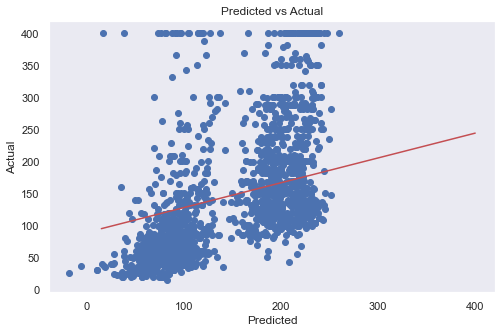

In [70]:
plt.subplots(figsize=(8,5))
plt.scatter(y_pred1,y_test)
plt.plot(np.unique(y_test),np.poly1d(np.polyfit(y_test,y_pred1, 1))(np.unique(y_test)),c='r')
plt.title('Predicted vs Actual')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.grid()
plt.show()

In [98]:
#1. Import the estimator object(model)
from sklearn.neighbors import KNeighborsRegressor
2#create an instance for thee estimator
knn=KNeighborsRegressor()
#3. Use the training data to train the estimator
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [110]:
#prediction and model evaluation using kneighbor
y_train_pred2=knn.predict(X_train)
y_pred2=knn.predict(X_test)

print('Train r2 score: ', r2_score(y_train,y_train_pred2))
print('Test r2 score:', r2_score(y_test, y_pred2))

print('train_mae:', mean_absolute_error(y_train,y_train_pred2))
print('test_mae:', mean_absolute_error(y_test,y_pred2))

print('train_mse1:', mean_squared_error( y_train,y_train_pred2))
print('test_mse1:', mean_squared_error(y_test,y_pred2))



Train r2 score:  0.67578179021065
Test r2 score: 0.4354168402361034
train_mae: 37.61849802371542
test_mae: 48.48217446270544
train_mse1: 3233.0794561264825
test_mse1: 5298.720505689002


# Decision Tree

In [111]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [112]:
y_train_pred3=dtree.predict(X_train)
y_pred3=dtree.predict(X_test)

print('Train r2 score: ', r2_score(y_train,y_train_pred3))
print('Test r2 score:', r2_score(y_test, y_pred3))

print('train_mae:', mean_absolute_error(y_train,y_train_pred3))
print('test_mae:', mean_absolute_error(y_test,y_pred3))

print('train_mse1:', mean_squared_error( y_train,y_train_pred3))
print('test_mse1:', mean_squared_error(y_test,y_pred3))

Train r2 score:  1.0
Test r2 score: 0.21038837710675284
train_mae: 0.0
test_mae: 51.98925410872314
train_mse1: 0.0
test_mse1: 7410.655499367888


# D. Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=3)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=3)

In [114]:
y_train_pred4=rf.predict(X_train)
y_pred4=rf.predict(X_test)

print('Train r2 score: ', r2_score(y_train,y_train_pred4))
print('Test r2 score:', r2_score(y_test,y_pred4))

print('train_mae:', mean_absolute_error(y_train,y_train_pred4))
print('test_mae:', mean_absolute_error(y_test,y_pred4))

print('train_mse1:', mean_squared_error( y_train,y_train_pred4))
print('test_mse1:', mean_squared_error(y_test,y_pred4))

Train r2 score:  0.3978809597611682
Test r2 score: 0.3624941133105267
train_mae: 57.042972556098086
test_mae: 56.23532778709491
train_mse1: 6004.285510069174
test_mse1: 5983.114189434192


# E. XGBOOST

In [115]:
from xgboost import XGBRegressor
xgb_model1=XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [116]:
y_train_pred5=xgb_model1.predict(X_train)
y_pred5=xgb_model1.predict(X_test)

print('Train r2 score: ', r2_score(y_train,y_train_pred5))
print('Test r2 score:', r2_score(y_test, y_pred5))

print('train_mae:', mean_absolute_error(y_train,y_train_pred5))
print('test_mae:', mean_absolute_error(y_test,y_pred5))

print('train_mse1:', mean_squared_error( y_train,y_train_pred5))
print('test_mse1:', mean_squared_error(y_test,y_pred5))

Train r2 score:  0.898057285013881
Test r2 score: 0.5753746136669636
train_mae: 21.862464867175333
test_mae: 42.377371064404926
train_mse1: 1016.5650403705511
test_mse1: 3985.190140527555


# Optimization

# Using GridSearchCV For Optimization

In [88]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [79]:
#checking parameters that can be optimized in models
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [80]:
param_grid=({'n_estimators':[10,100,1000], 'n_jobs':[2,4,6,8], 'max_depth':[2,10,100]},
     {'n_estimators':[10,100,1000], 'max_depth':[2,10,100], 'n_jobs':[2,4,6,8]})

grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='r2',return_train_score=True)

grid_search=grid_search.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
#To see the best parameter for our model
grid_search.best_params_

In [ ]:
rf=RandomForestRegressor(max_depth=100, n_estimators=1000,n_jobs=4)

rf.fit(X_train,y_train)

y_train_pred4a=rf.predict(X_train)
y_pred4a=rf.predict(X_test)

print('Train r2 score: ', r2_score(y_train,y_train_pred4a))
print('Test r2 score:', r2_score(y_test, y_pred4a))

print('train_mae:', mean_absolute_error(y_train,y_train_pred4a))
print('test_mae:', mean_absolute_error(y_test,y_pred4a))

print('train_mse1:', mean_squared_error( y_train,y_train_pred4a))
print('test_mse1:', mean_squared_error(y_test,y_pred4a))

# Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [ ]:
#use this to check the evaluation scores available for use in your validation
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
#We will be using 'r' evaluation metric to carry out validation on the linear regression model
scores=cross_val_score(rf,X_train,y_train,scoring='r2',cv=10)

def display_scores(scores):
    print('scores:', scores)
    print('mean:',scores.mean())
    print('standard deviation:', scores.std())
    
display_scores(scores)

 Interpreting this, we can say our model has an actual r2 score of 62%+/-4%

In [80]:
import pickle
from pickle import dump

In [117]:
#to save the model
dump(rf,open('model(rf).pkl','wb'))
#to save the scaler
dump(scaler,open('scaler.pkl','wb'))

In [ ]:
#to load the model from the disk
model=pickle.load(open('model(rf).pkl','rb'))
model